# <span style="color:green">Mini-Project 1: Investigating Controls on Earth’s Surface Temperature

### Made by Emma Holtzman emma.holtzman@temple.edu

In [1]:
import pandas as pd                          
import matplotlib.pyplot as plt 
import numpy as np
import cmocean 

%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6   

In [2]:
#Importing data sets
#Greenhouse Gas Concentration Datasets
CO2_MaunaLoa = pd.read_csv('./data/greenhouse_gases/CO2_MaunaLoa_TimeSeries.csv',parse_dates=['Date'])
CO2_NOAA = pd.read_csv('./data/greenhouse_gases/CO2_NOAA_TimeSeries.csv',parse_dates=['Date'])
CO2_WDCGG = pd.read_csv('./data/greenhouse_gases/CO2_WDCGG_TimeSeries.csv',parse_dates=['Date'])
CH4_NOAA = pd.read_csv('./data/greenhouse_gases/NOAA_CH4.csv')
N2O_WDCGG = pd.read_csv('./data/greenhouse_gases/WDCGG_N2O.csv')

#Carbon Emission Datasets
FFE_Type = pd.read_csv('./data/greenhouse_gases/Fossil_Fuel_Emission_By_Type.csv')
Global_CBudget = pd.read_csv('./data/greenhouse_gases/Global_C_Budget_2022.csv')
Nation_FFE = pd.read_csv('./data/greenhouse_gases/Nation_Fossil_Fuel_Emissions.csv')

#Global Average Surface Temperature Datasets
    #Annual global mean surface air temperature datasets
gmt_Berkeley = pd.read_csv('./data/temp/gmt_Berkeley_Earth.csv')
gmt_Era5 = pd.read_csv('./data/temp/gmt_ERA5.csv')
gmt_GISTEMP = pd.read_csv('./data/temp/gmt_GISTEMP.csv')
gmt_HadCRUT5 = pd.read_csv('./data/temp/gmt_HadCRUT5.csv')
gmt_JRA = pd.read_csv('./data/temp/gmt_JRA-55.csv')
gmt_NOAA = pd.read_csv('./data/temp/gmt_NOAAGlobalTemp.csv')
    #Annual global mean surface air temperature over land
lsat_Berkeley = pd.read_csv('./data/temp/lsat_Berkeley_Earth_Land.csv')
lsat_CRUTEM5 = pd.read_csv('./data/temp/lsat_CRUTEM5.csv')
    #Annual global mean surface temperature over the ocean
sst_ERSST = pd.read_csv('./data/temp/sst_ERSSTv5.csv')
sst_HadSST3 = pd.read_csv('./data/temp/sst_HadSST3.csv')
sst_HadSST4 = pd.read_csv('./data/temp/sst_HadSST4.csv')

#NASA GISS-E2 Model Output
NASA_sim = pd.read_csv('./data/model_results/NASA_GISS_Response_To_Forcings.csv')
Obs_Temp = pd.read_csv('./data/model_results/Observed_Temps.csv')

In [3]:
#Converting dates from integers into readable dates of time
Calendar_Date_CH4_NOAA = pd.to_datetime(CH4_NOAA[['Year','Month']].assign(day=1))
Calendar_Date_N2O_WDCGG = pd.to_datetime(N2O_WDCGG[['Year','Month']].assign(day=1))

In [4]:
#Adding a new column into the datasets containing these dates
CH4_NOAA['Date'] = Calendar_Date_CH4_NOAA
N2O_WDCGG['Date'] = Calendar_Date_N2O_WDCGG

# <span style="color:blue"> Introduction

<span style="color:red"> #1 Considering a stable / steady - state climate (one that is not undergoing change) , what fundamentally controls Earth’s temperature?
<span style="color:black"> A steady state climate is one in which the incoming shortwave solar radiation is equal to the outgoing longwave radiation. Solar radiation is pivitol to controlling the Earth's temperature

<span style="color:red"> #2 What is the role of greenhouse gases in Earth’s steady - state climate (your explanation should include the terms longwave & shortwave)? In your answer, define what a greenhouse gas is ---- why is CH 4 a greenhouse gas but N 2 is not?
<span style="color:black">answer

# <span style="color:blue"> Analysis

In [5]:
#function defining the percent change for each greenhouse gas
def perc_change (concentration, gas= 'CO2'):  
    if gas == 'CO2':
        pchange = (concentration - 280)/280*100
    if gas == 'CH4':
        pchange = (concentration - 700)/700*100
    if gas == 'N2O':
        pchange = (concentration-280)/280 *100
    return gas, pchange
        

In [6]:
CO2_lastyr = CO2_NOAA[-13:-1]

In [7]:
CO2_ppm = CO2_lastyr['NOAA CO2 (ppm)']
CO2_ppm.mean()  #annual average amount of CO2 for last year

417.06083333333345

In [8]:
CH4_lastyr = CH4_NOAA[-13:-1]

In [9]:
CH4_ppb = CH4_lastyr['NOAA CH4 (ppb)']
CH4_ppb.mean() #annual average amount of CH4 for last year

1910.675833333333

In [10]:
N2O_lastyr = N2O_WDCGG[-13:-1]

In [11]:
N2O_ppb = N2O_lastyr['WDCGG N2O (ppb)']
N2O_ppb.mean() #annual average amount of N2O for last year

334.39166666666665

In [12]:
perc_change(417.06, gas='CO2')

('CO2', 48.949999999999996)

In [13]:
perc_change(1910.68, gas='CH4')

('CH4', 172.95428571428573)

In [14]:
perc_change(334.39, gas='N2O')

('N2O', 19.424999999999994)

<span style="color:red"> #3
<span style="color:black">The annual average of these greenhouse gases are as follows: CO2: 417.06 ppm, CH4: 1910.68 ppb, and N2O: 334.39 ppb. The provided pre-industrial levels of these gases were approximately CO2: ~280 ppm, 
C  : ~700 pp, and N2 O: ~280 p. pbBased on these annual averages and thpre-industrial levels, we can calculate a percent change for each gas: CO2: 48.95%, CH4: 172.95%, and N2O: 19.42%. 

<span style="color:red"> #4
<span style="color:black">Based on these calculated percent changes, it is evident that the amount of CH4 has increased much more than the other greehouse gases.

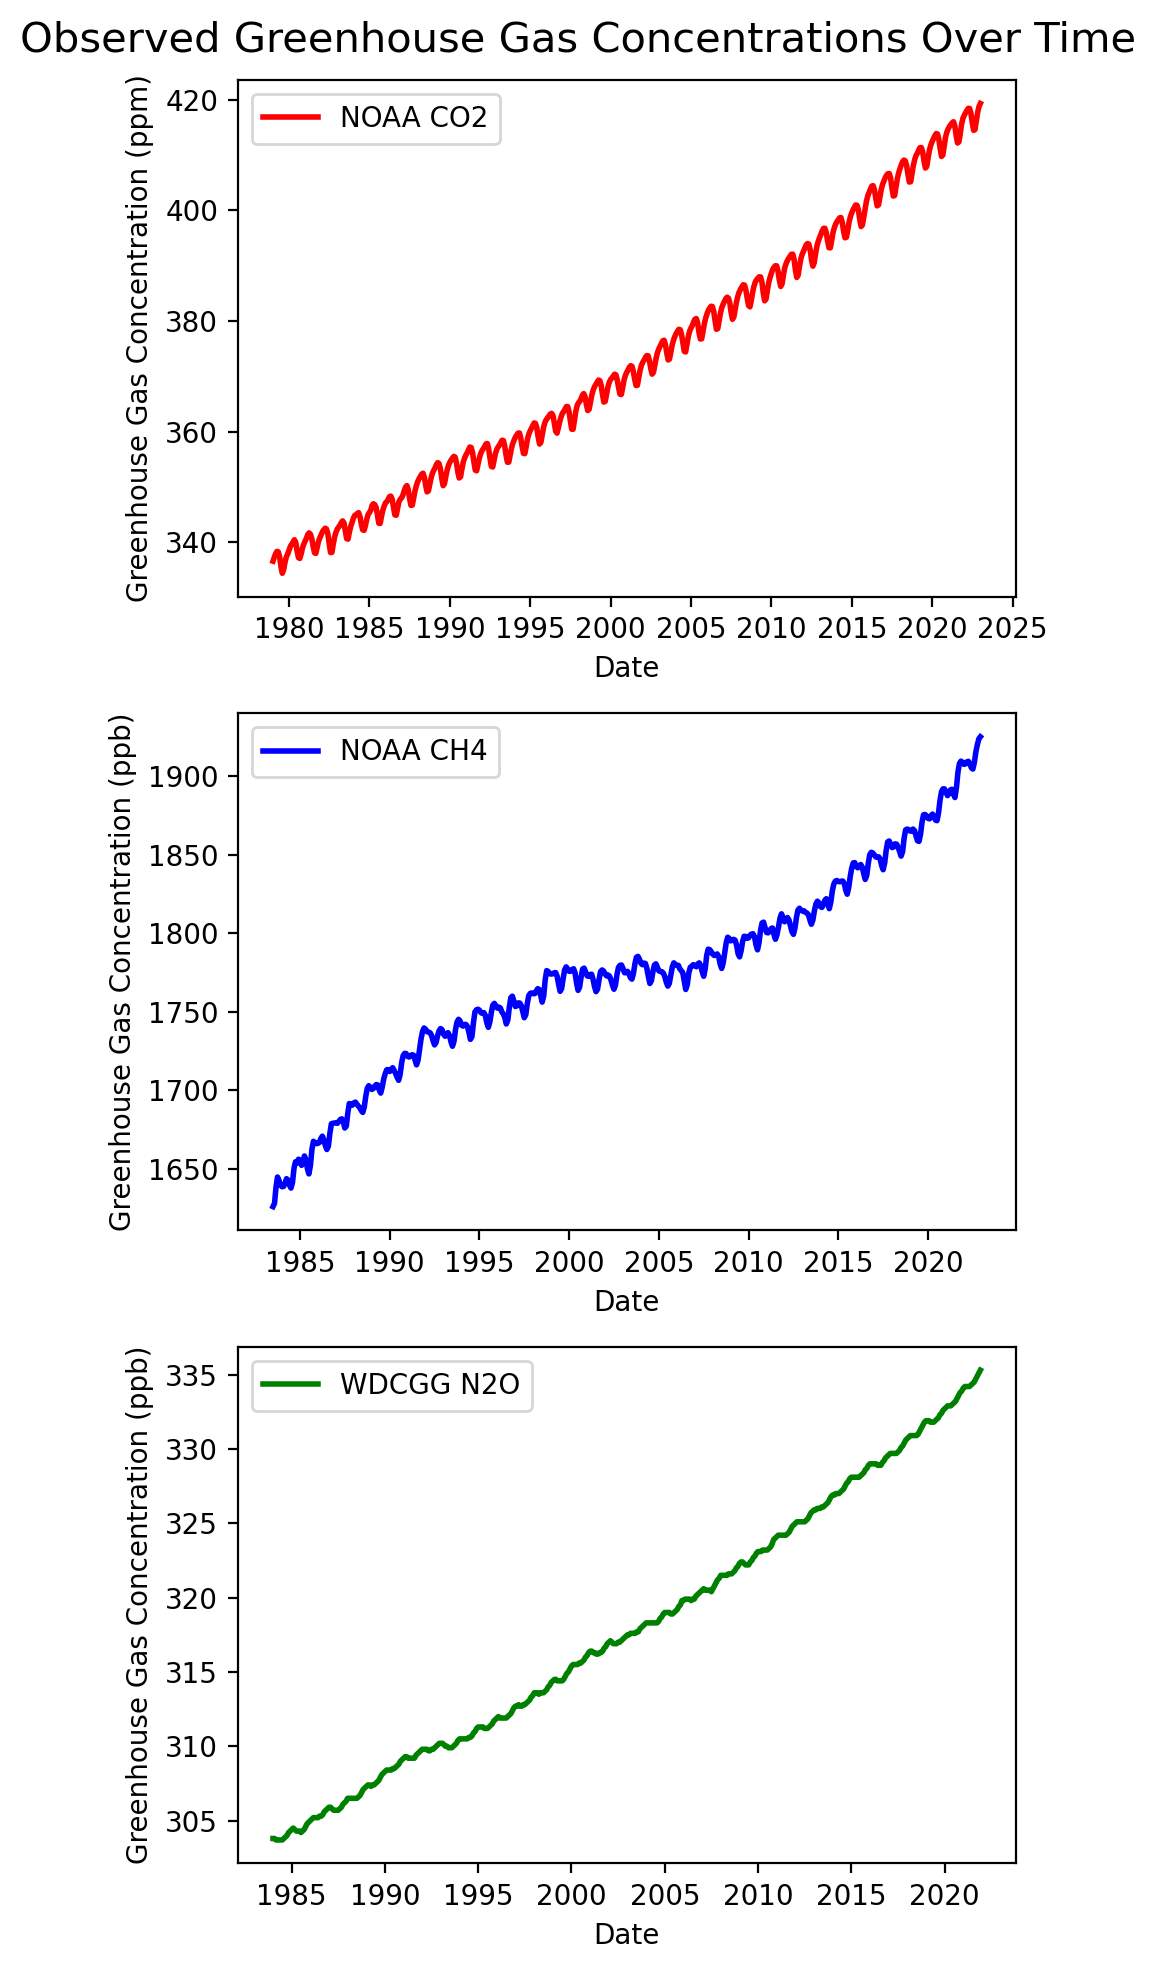

In [15]:
#plots of the greenhouse gas concentrations from ~1980 to present day

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (5, 10))
fig.suptitle('Observed Greenhouse Gas Concentrations Over Time', fontsize=15)
ax1.plot(CO2_NOAA['Date'], CO2_NOAA['NOAA CO2 (ppm)'], linewidth=2,label='NOAA CO2', color='red')
ax2.plot(CH4_NOAA['Date'], CH4_NOAA['NOAA CH4 (ppb)'], linewidth=2, label='NOAA CH4', color='blue')
ax3.plot(N2O_WDCGG['Date'], N2O_WDCGG['WDCGG N2O (ppb)'], linewidth=2, label='WDCGG N2O', color='green')
ax1.legend()
ax1.set_ylabel('Greenhouse Gas Concentration (ppm)')
ax1.set_xlabel('Date')
ax2.legend()
ax2.set_ylabel('Greenhouse Gas Concentration (ppb)')
ax2.set_xlabel('Date')
ax3.legend()
ax3.set_ylabel('Greenhouse Gas Concentration (ppb)')
ax3.set_xlabel('Date')
plt.tight_layout()

Figure 1: This figure displays the concentrations of three different greenhouse gases plotted over time. The greenhouse gases are CO2, CH4, and N2O. It is clear there is an upwards trend in concentrations of these overtime. CO2 rose by about 80 ppm, CH4 rose by about 250 ppb, and N2O rose by about 30 ppb.

<span style="color:red"> #5 Between approximately what concentrations did CO 2 oscillate between over the last 800,000 years? How do we know this?
<span style="color:black"> answer to 5

<span style="color:red"> #6 What temporal patterns stick out to you in your timeseries of CO 2 ? What explains it?
<span style="color:black"> answer to 6e 

<span style="color:red"> #8  Describe any long - term trends you observe in CO 2 , CH 4 , and N 2 O. What’s up with CH4? 
<span style="color:black"> answer 

In [16]:
CO2_MaunaLoa_lastyr = CO2_MaunaLoa[-13:-1]

In [17]:
CO2_WDCGG_lastyr = CO2_WDCGG[-13:-1]

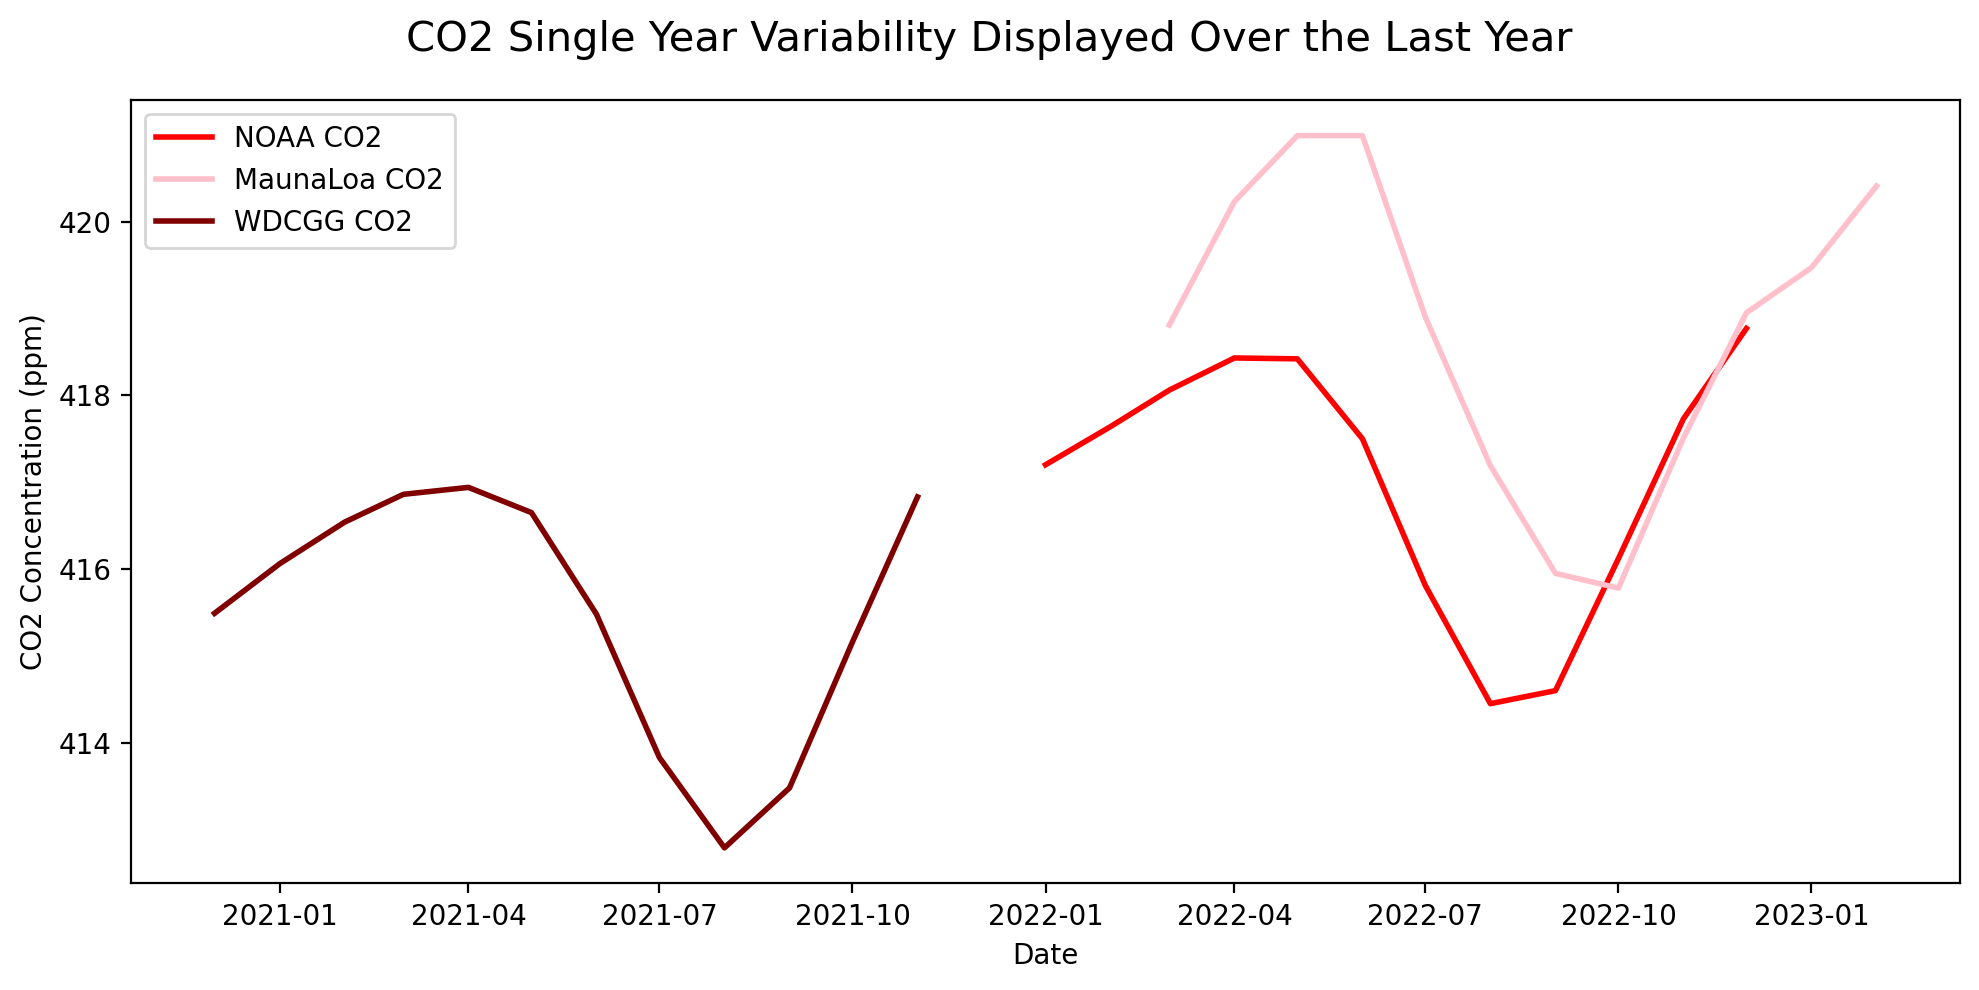

In [18]:
#plot comparing different locations measurements of the CO2 concentration over the last year

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
fig.suptitle('CO2 Single Year Variability Displayed Over the Last Year', fontsize=15)
ax.plot(CO2_lastyr['Date'], CO2_lastyr['NOAA CO2 (ppm)'], linewidth=2,label='NOAA CO2', color='red')
ax.plot(CO2_MaunaLoa_lastyr['Date'], CO2_MaunaLoa_lastyr['Mauna Loa CO2 (ppm)'], linewidth=2, label='MaunaLoa CO2', color='pink')
ax.plot(CO2_WDCGG_lastyr['Date'], CO2_WDCGG_lastyr['WDCGG CO2 (ppm)'], linewidth=2, label='WDCGG CO2', color='maroon')

ax.legend()
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_xlabel('Date')

plt.tight_layout()

Figure 2: This plot displays the year-to-year flux in CO2 concentrations. There are three data sets plotted, each with CO2 concentration measurments in ppm that were taken by different companies. Each show a years worth of data. NOAA and Mauna Loa both are plotted for the imediate last years worth of data, and WDCGG displays measurements from the year of 2021. It is highlighted by the repitition of the pattern in each line, that there is a cycle that occurs with CO2 concentrations. There is a peal around April and a dip around July/August.

<span style="color:red"> #11 How are the NOAA CO 2 and WDCGG CO 2 datasets different from the Mauna Loa data regarding its collection methods?
<span style="color:black"> answer 

<span style="color:red"> #13 Relative to the baseline period of all of the gmt datasets , how much have global average temperatures risen?
<span style="color:black"> answer 

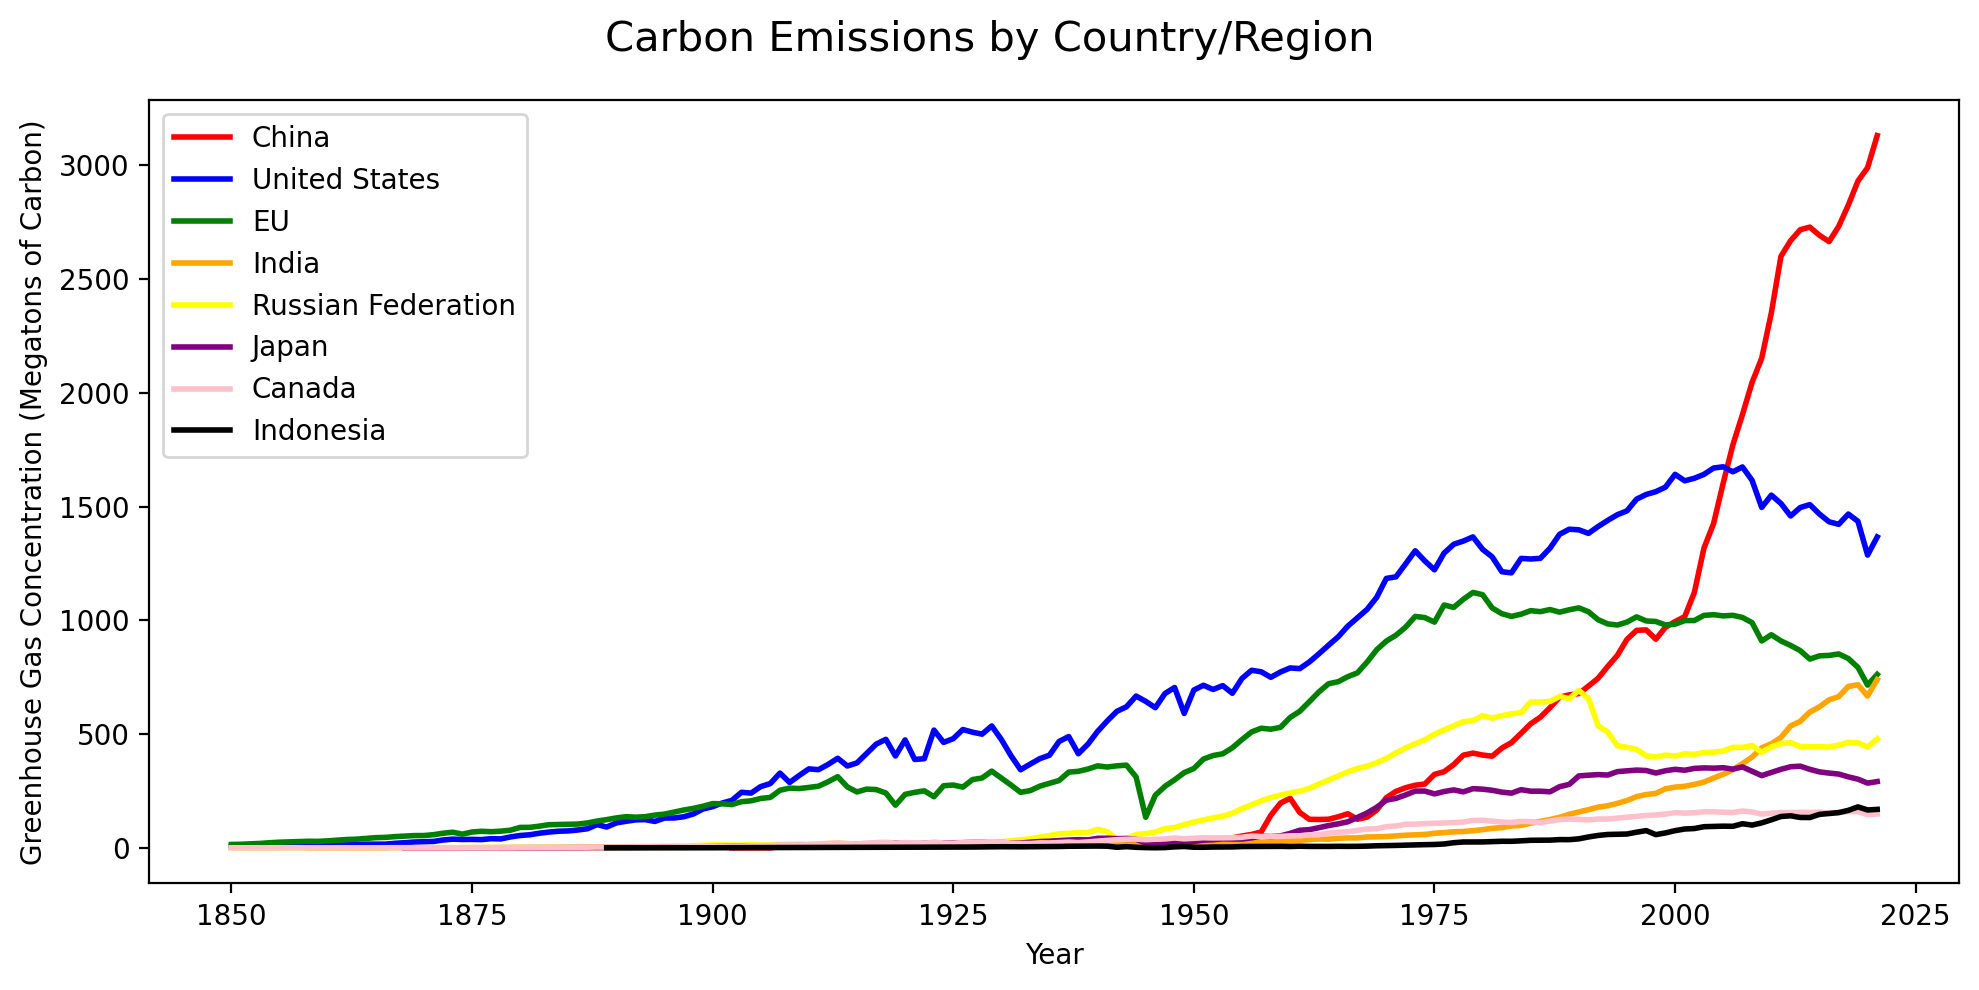

In [19]:
#plot comparing carbon emissions of various countries

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
fig.suptitle('Carbon Emissions by Country/Region', fontsize=15)
ax1.plot(Nation_FFE['Year'], Nation_FFE['CHINA (MAINLAND)'], linewidth=2,label='China', color='red')
ax1.plot(Nation_FFE['Year'], Nation_FFE['UNITED STATES OF AMERICA'], linewidth=2, label='United States', color='blue')
ax1.plot(Nation_FFE['Year'], Nation_FFE['EU27'], linewidth=2, label='EU', color='green')
ax1.plot(Nation_FFE['Year'], Nation_FFE['INDIA'], linewidth=2, label='India', color='orange')
ax1.plot(Nation_FFE['Year'], Nation_FFE['RUSSIAN FEDERATION'], linewidth=2, label='Russian Federation', color='yellow')
ax1.plot(Nation_FFE['Year'], Nation_FFE['JAPAN'], linewidth=2, label='Japan', color='purple')
ax1.plot(Nation_FFE['Year'], Nation_FFE['CANADA'], linewidth=2, label='Canada', color='pink')
ax1.plot(Nation_FFE['Year'], Nation_FFE['INDONESIA'], linewidth=2, label='Indonesia', color='black')

ax1.legend()
ax1.set_ylabel('Greenhouse Gas Concentration (Megatons of Carbon)')
ax1.set_xlabel('Year')

plt.tight_layout()

Figure 3: This graph dives into the sources of carbon in the atmosphere by countries. Here, it is clear to see which what the carbon emissions of the top 8 contributors of carbon into the atmosphere. In the last year, China was the highest contributor with the United States in second. There is a clear upwards trend in the amount of carbon that has been emitted overtime.

<span style="color:red"> #9 What are the top 10 emitting countries and / or regions? 
<span style="color:black"> answer 

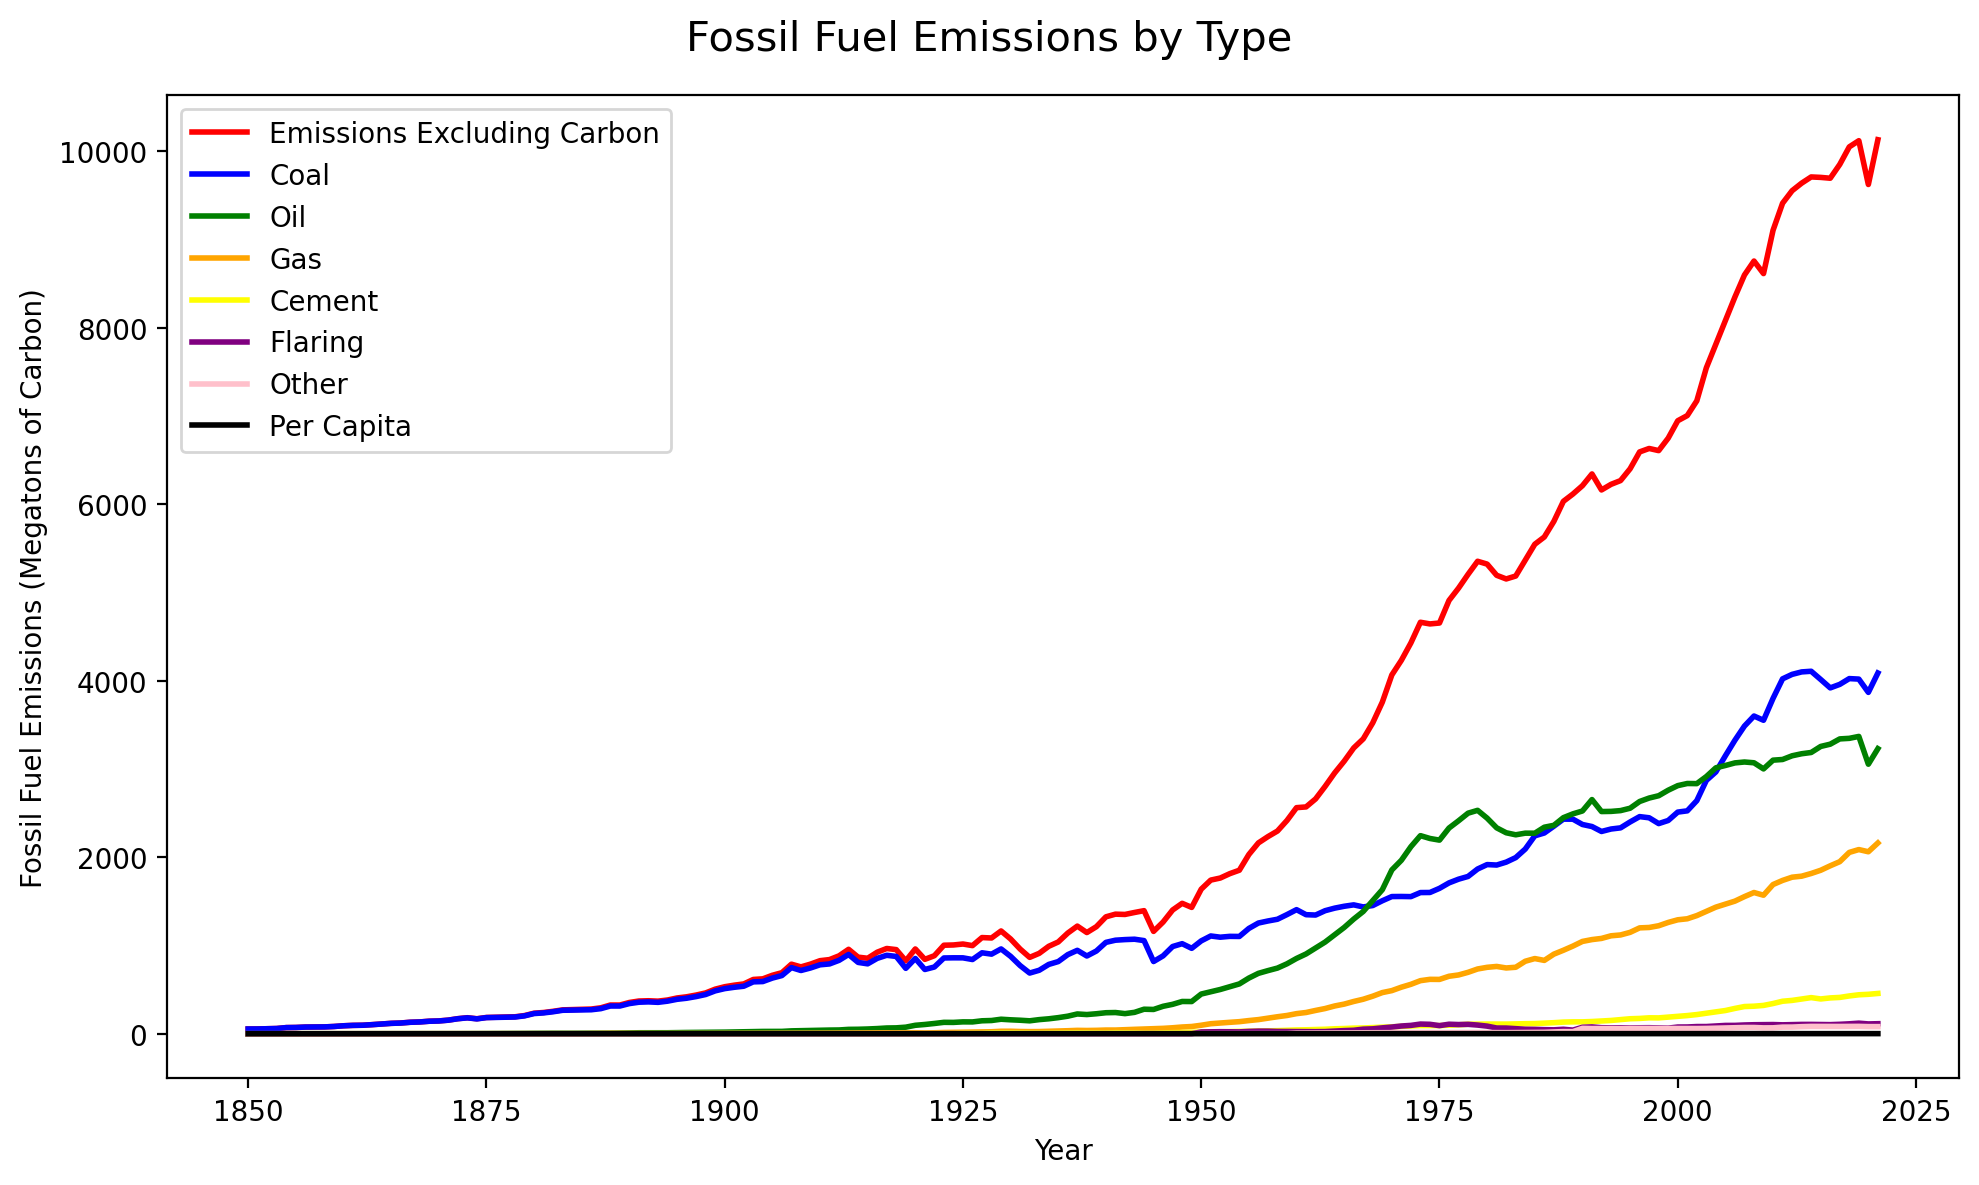

In [23]:
#plot comparing the fossil fuel emissions based on the type of contributor

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6))
fig.suptitle('Fossil Fuel Emissions by Type', fontsize=15)
ax1.plot(FFE_Type['Year'], FFE_Type['fossil.emissions.excluding.carbonation (MtC/yr)'], linewidth=2,label='Emissions Excluding Carbon', color='red')
ax1.plot(FFE_Type['Year'], FFE_Type['Coal (MtC/yr)'], linewidth=2, label='Coal', color='blue')
ax1.plot(FFE_Type['Year'], FFE_Type['Oil (MtC/yr)'], linewidth=2, label='Oil', color='green')
ax1.plot(FFE_Type['Year'], FFE_Type['Gas (MtC/yr)'], linewidth=2, label='Gas', color='orange')
ax1.plot(FFE_Type['Year'], FFE_Type['Cement.emission (MtC/yr)'], linewidth=2, label='Cement', color='yellow')
ax1.plot(FFE_Type['Year'], FFE_Type['Flaring (MtC/yr)'], linewidth=2, label='Flaring', color='purple')
ax1.plot(FFE_Type['Year'], FFE_Type['Other (MtC/yr)'], linewidth=2, label='Other', color='pink')
ax1.plot(FFE_Type['Year'], FFE_Type['Per.Capita (MtC/yr)'], linewidth=2, label='Per Capita', color='black')

ax1.legend()
ax1.set_ylabel('Fossil Fuel Emissions (Megatons of Carbon)')
ax1.set_xlabel('Year')

plt.tight_layout()

Figure 4: This graph explains what types of things (ex. processes) that emit fossil fuels. Coal, oil, and gas are the three biggest contributors. The total emissions excluding carbon this past year was almost 1000 Megatons of Carbon. It is clear that as time has progressed, there has been an increase in the emissions of fossil fuels from emissions excluding carbon, gas, oil, coal, and cement.

<span style="color:red"> #10 Rank the fossil fuel emissions in order by type (Coal, Flaring ... etc)
<span style="color:black"> Emissions excluding carbon, coal, oil, gas, cement, flaring, other, per capita.

<span style="color:red"> # 7 What are the main sources of emissions of CH 4 ? CO 2 ? N 2 O? a. Which is the most “potent” greenhouse gas? b. Which one sticks around in the atmosphere longest?
<span style="color:black"> answer 

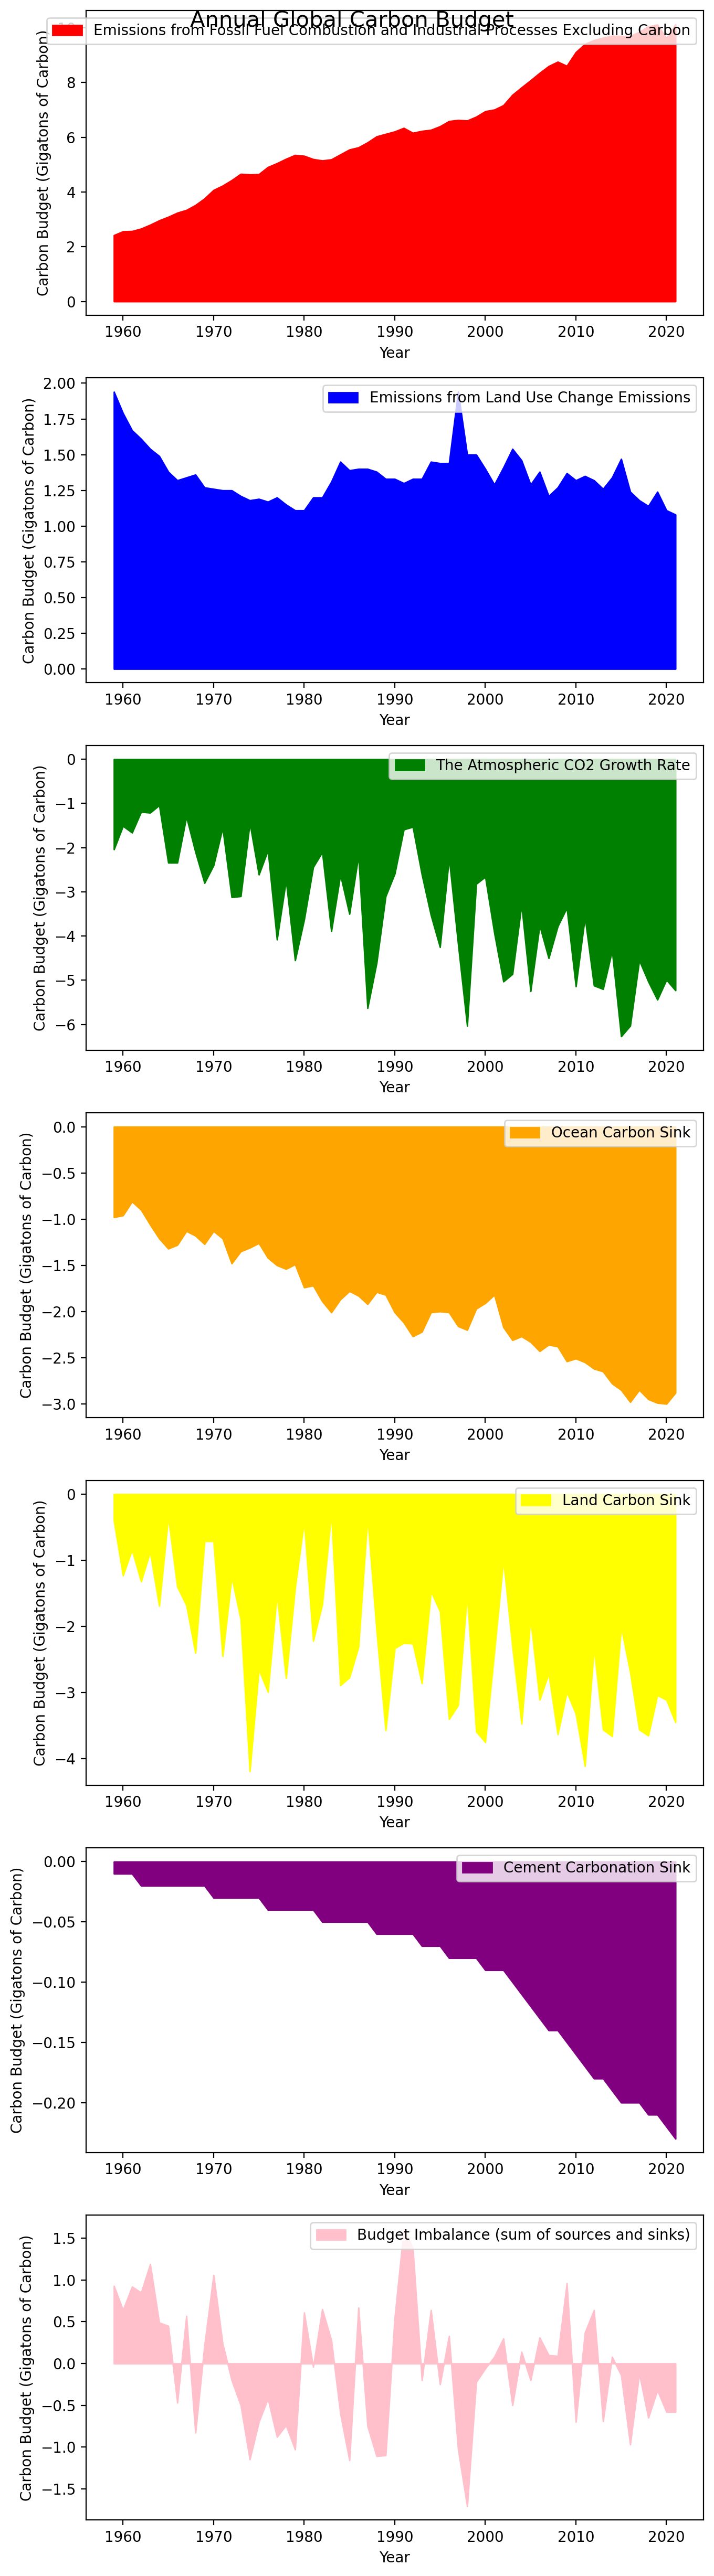

In [38]:
#plots displaying the annual global carbon budget given various changes/effects

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows = 7, ncols = 1, figsize = (7, 25))
fig.suptitle('Annual Global Carbon Budget', fontsize=15)
ax1.fill_between(Global_CBudget['Year'], Global_CBudget['fossil emissions excluding carbonation'], label='Emissions from Fossil Fuel Combustion and Industrial Processes Excluding Carbon', color='red')
ax2.fill_between(Global_CBudget['Year'], Global_CBudget['land-use change emissions'],  label='Emissions from Land Use Change Emissions', color='blue')
ax3.fill_between(Global_CBudget['Year'], Global_CBudget['atmospheric growth']*-1, label='The Atmospheric CO2 Growth Rate', color='green')
ax4.fill_between(Global_CBudget['Year'], Global_CBudget['ocean sink']*-1, label='Ocean Carbon Sink', color='orange')
ax5.fill_between(Global_CBudget['Year'], Global_CBudget['land sink']*-1, label='Land Carbon Sink', color='yellow')
ax6.fill_between(Global_CBudget['Year'], Global_CBudget['cement carbonation sink']*-1, label='Cement Carbonation Sink', color='purple')
ax7.fill_between(Global_CBudget['Year'], Global_CBudget['budget imbalance'], label='Budget Imbalance (sum of sources and sinks)', color='pink')


ax1.legend()
ax1.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax1.set_xlabel('Year')
ax2.legend()
ax2.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax2.set_xlabel('Year')
ax3.legend()
ax3.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax3.set_xlabel('Year')
ax4.legend()
ax4.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax4.set_xlabel('Year')
ax5.legend()
ax5.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax5.set_xlabel('Year')
ax6.legend()
ax6.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax6.set_xlabel('Year')
ax7.legend()
ax7.set_ylabel('Carbon Budget (Gigatons of Carbon)')
ax7.set_xlabel('Year')

plt.tight_layout()

Figure 5: This figure displays a series of graphs that highlight the carbon budget given various sources of carbon, the growth of carbon dioxide concentration in the atmosphere, how much carbon is sbsorbed from various processes, and finally the imbalance between the sources and absorbers of carbon. 

In [32]:
Global_CBudget

Year  fossil emissions excluding carbonation  land-use change emissions  \
0   1959                                    2.42                       1.94   
1   1960                                    2.56                       1.79   
2   1961                                    2.57                       1.67   
3   1962                                    2.66                       1.61   
4   1963                                    2.80                       1.54   
..   ...                                     ...                        ...   
58  2017                                    9.85                       1.18   
59  2018                                   10.05                       1.14   
60  2019                                   10.12                       1.24   
61  2020                                    9.62                       1.11   
62  2021                                   10.13                       1.08   

    atmospheric growth  ocean sink  land sink  cement carbonation sink  \
0                 2.04        0.98       0.40                     0.01   
1                 1.51        0.96       1.23                     0.01   
2                 1.66        0.81       0.84                     0.01   
3                 1.19        0.90       1.32                     0.02   
4                 1.21        1.06       0.87                     0.02   
..                 ...         ...        ...                      ...   
58                4.55        2.85       3.56                     0.20   
59                5.03        2.95       3.65                     0.21   
60                5.44        2.99       3.04                     0.21   
61                4.99        3.00       3.11                     0.22   
62                5.23        2.88       3.45                     0.23   

    budget imbalance  
0               0.93  
1               0.64  
2               0.92  
3               0.85  
4               1.19  
..               ...  
58             -0.12  
59             -0.65  
60             -0.32  
61             -0.58  
62             -0.58  

[63 rows x 8 columns]

<span style="color:red"> #12 From your analysis of the global carbon budget, what fraction or percent of the total carbon emitted: n Stays in the atmosphere? n Is taken up by the land? n Is taken up by the ocean?
<span style="color:black"> answer 

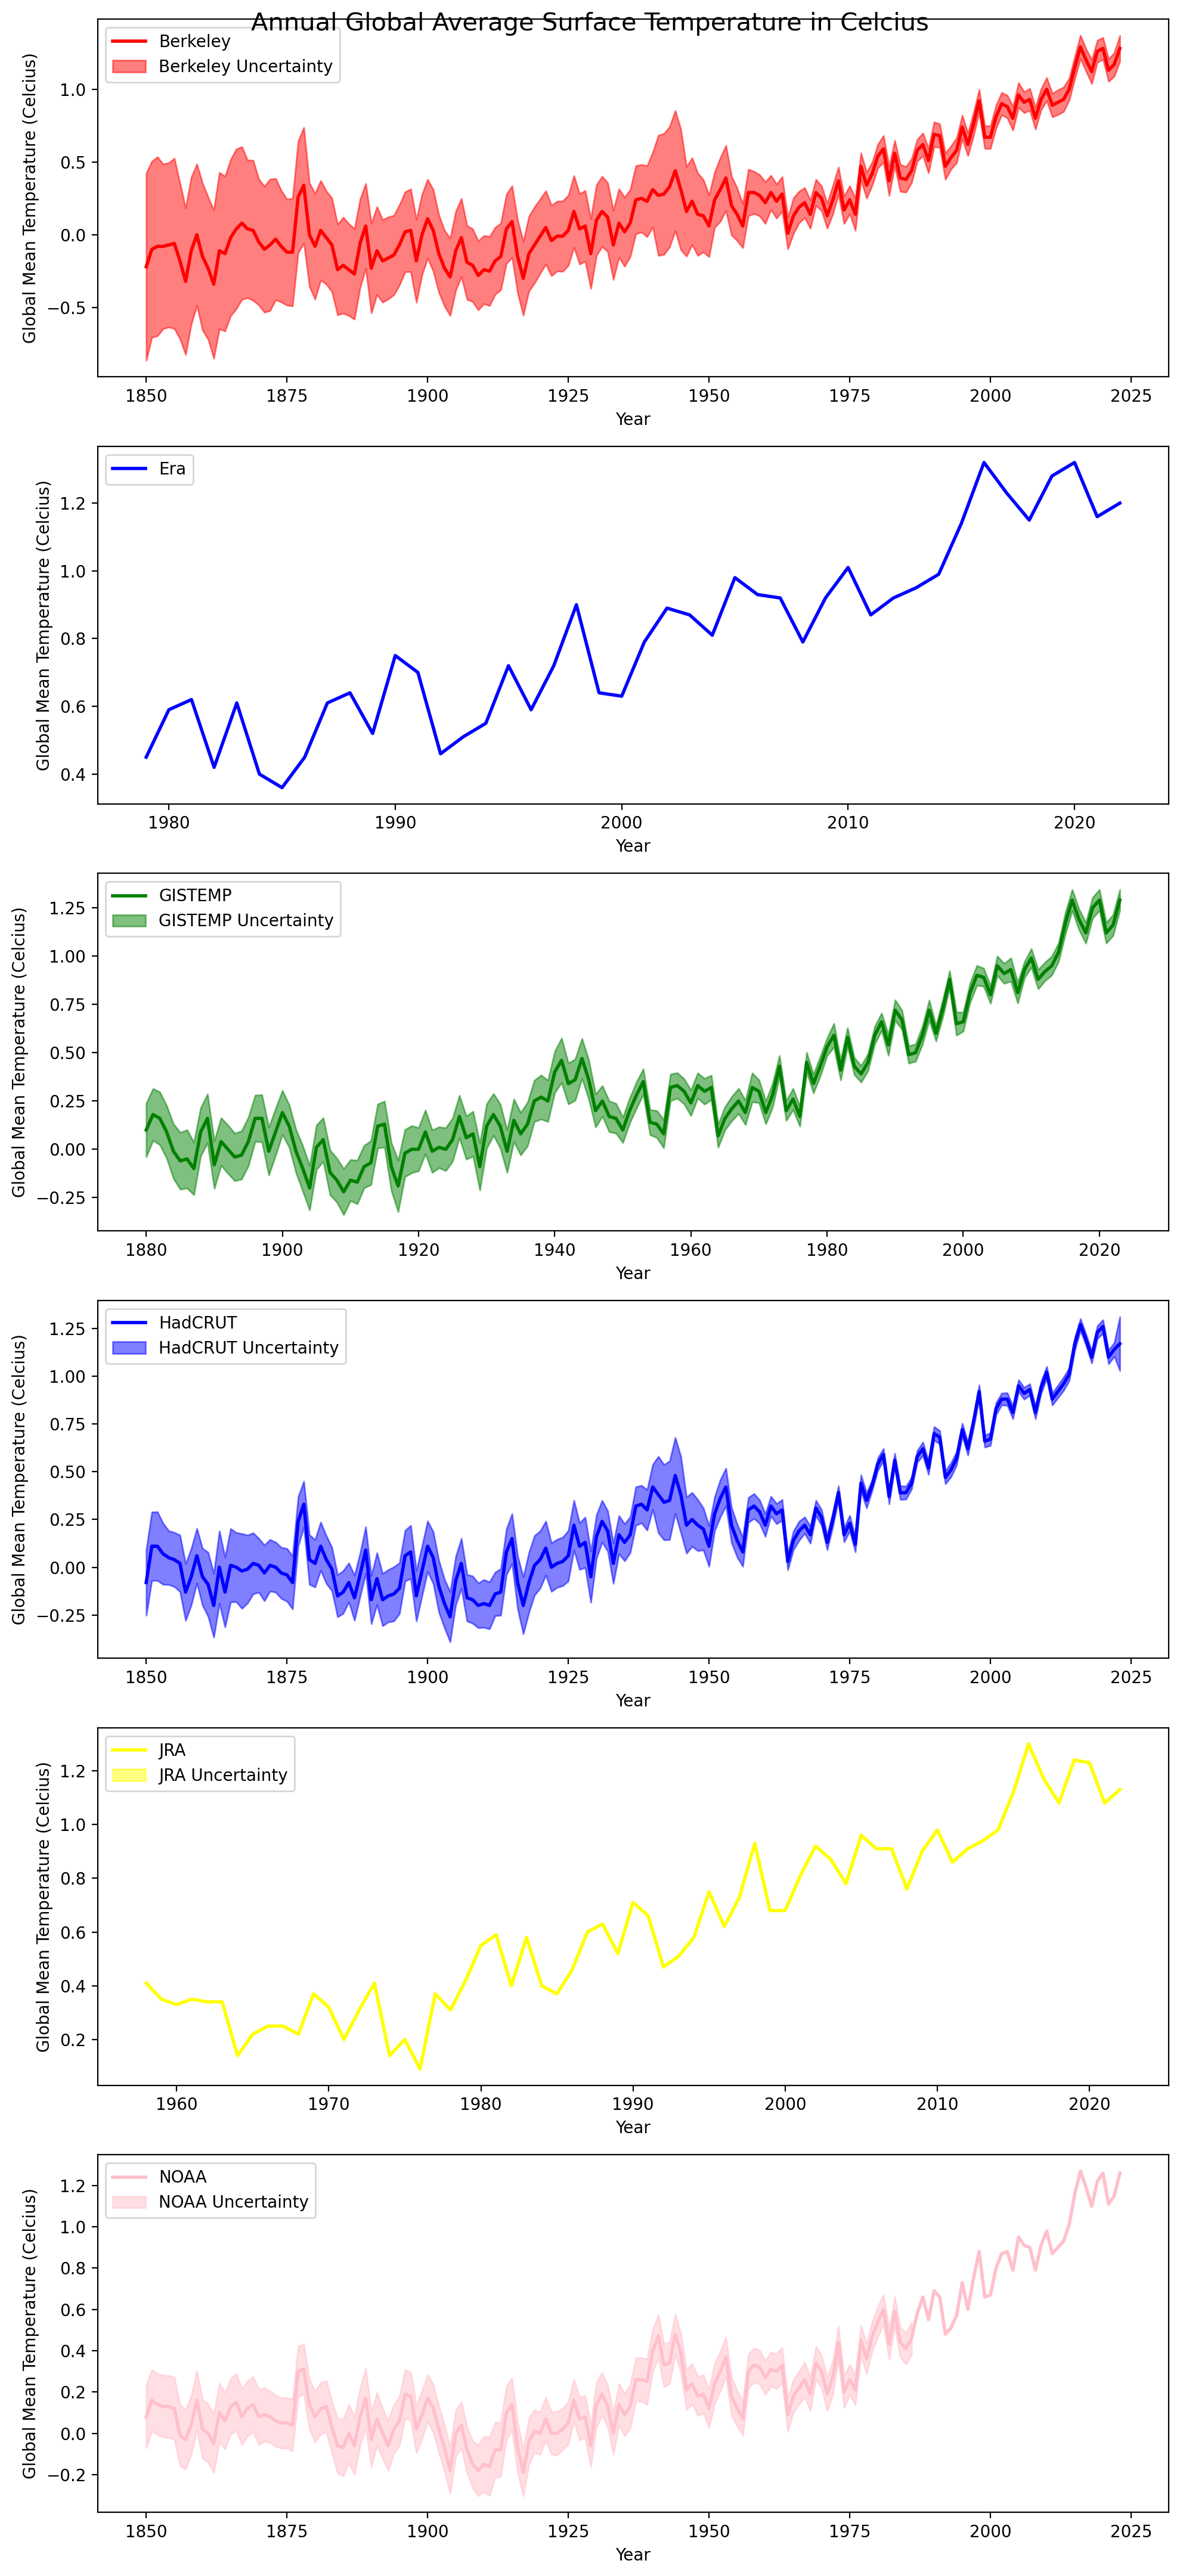

In [101]:
#plots displaying GMT in degrees celcius

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, ncols = 1, figsize = (10, 22))
fig.suptitle('Annual Global Average Surface Temperature in Celcius', fontsize=15)
ax1.plot(gmt_Berkeley ['Year'], gmt_Berkeley['Berkeley Earth (degC)'], linewidth=2,label='Berkeley', color='red')
ax1.fill_between(gmt_Berkeley ['Year'], gmt_Berkeley['Berkeley Earth (degC)']+gmt_Berkeley ['Berkeley Earth uncertainty'], gmt_Berkeley['Berkeley Earth (degC)']-gmt_Berkeley ['Berkeley Earth uncertainty'], label='Berkeley Uncertainty', alpha=0.5,color='red')

ax2.plot(gmt_Era5 ['Year'], gmt_Era5['ERA5 (degC)'], linewidth=2,label='Era', color='blue')

ax3.plot(gmt_GISTEMP  ['Year'], gmt_GISTEMP ['GISTEMP (degC)'], linewidth=2,label='GISTEMP', color='green')
ax3.fill_between(gmt_GISTEMP  ['Year'], gmt_GISTEMP ['GISTEMP (degC)']+gmt_GISTEMP  ['GISTEMP uncertainty'], gmt_GISTEMP ['GISTEMP (degC)']-gmt_GISTEMP  ['GISTEMP uncertainty'], label='GISTEMP Uncertainty', alpha=0.5,color='green')

ax4.plot(gmt_HadCRUT5 ['Year'], gmt_HadCRUT5['HadCRUT5 (degC)'], linewidth=2,label='HadCRUT', color='blue')
ax4.fill_between(gmt_HadCRUT5 ['Year'], gmt_HadCRUT5['HadCRUT5 (degC)']+gmt_HadCRUT5 ['HadCRUT5 uncertainty'], gmt_HadCRUT5['HadCRUT5 (degC)']-gmt_HadCRUT5 ['HadCRUT5 uncertainty'], label='HadCRUT Uncertainty', alpha=0.5,color='blue')

ax5.plot(gmt_JRA ['Year'], gmt_JRA['JRA-55 (degC)'], linewidth=2,label='JRA', color='yellow')
ax5.fill_between(gmt_JRA ['Year'], gmt_JRA['JRA-55 (degC)']+gmt_JRA['JRA-55 uncertainty'], gmt_JRA['JRA-55 (degC)']-gmt_JRA['JRA-55 uncertainty'], label='JRA Uncertainty', alpha=0.5,color='yellow')

ax6.plot(gmt_NOAA ['Year'], gmt_NOAA['NOAAGlobalTemp (degC)'], linewidth=2,label='NOAA', color='pink')
ax6.fill_between(gmt_NOAA ['Year'], gmt_NOAA['NOAAGlobalTemp (degC)']+gmt_NOAA['NOAAGlobalTemp uncertainty'], gmt_NOAA['NOAAGlobalTemp (degC)']-gmt_NOAA['NOAAGlobalTemp uncertainty'], label='NOAA Uncertainty', alpha=0.5,color='pink')

ax1.legend()
ax1.set_ylabel('Global Mean Temperature (Celcius)')
ax1.set_xlabel('Year')
ax2.legend()
ax2.set_ylabel('Global Mean Temperature (Celcius)')
ax2.set_xlabel('Year')
ax3.legend()
ax3.set_ylabel('Global Mean Temperature (Celcius)')
ax3.set_xlabel('Year')
ax4.legend()
ax4.set_ylabel('Global Mean Temperature (Celcius)')
ax4.set_xlabel('Year')
ax5.legend()
ax5.set_ylabel('Global Mean Temperature (Celcius)')
ax5.set_xlabel('Year')
ax6.legend()
ax6.set_ylabel('Global Mean Temperature (Celcius)')
ax6.set_xlabel('Year')

plt.tight_layout()

In [96]:
#funstion to convert celcius to fahrenheit
def c_to_f (x):
    fahrenheit= (x*9/5)+32
    return fahrenheit

In [97]:
#converting datasets to fahrenheit
Berk_f = c_to_f (gmt_Berkeley['Berkeley Earth (degC)'])
ERAf = c_to_f (gmt_Era5['ERA5 (degC)'])
GISTEMPf = c_to_f (gmt_GISTEMP ['GISTEMP (degC)'])
HADf = c_to_f (gmt_HadCRUT5['HadCRUT5 (degC)'])
JRAf = c_to_f (gmt_JRA['JRA-55 (degC)'])
NOAAf = c_to_f(gmt_NOAA['NOAAGlobalTemp (degC)'])

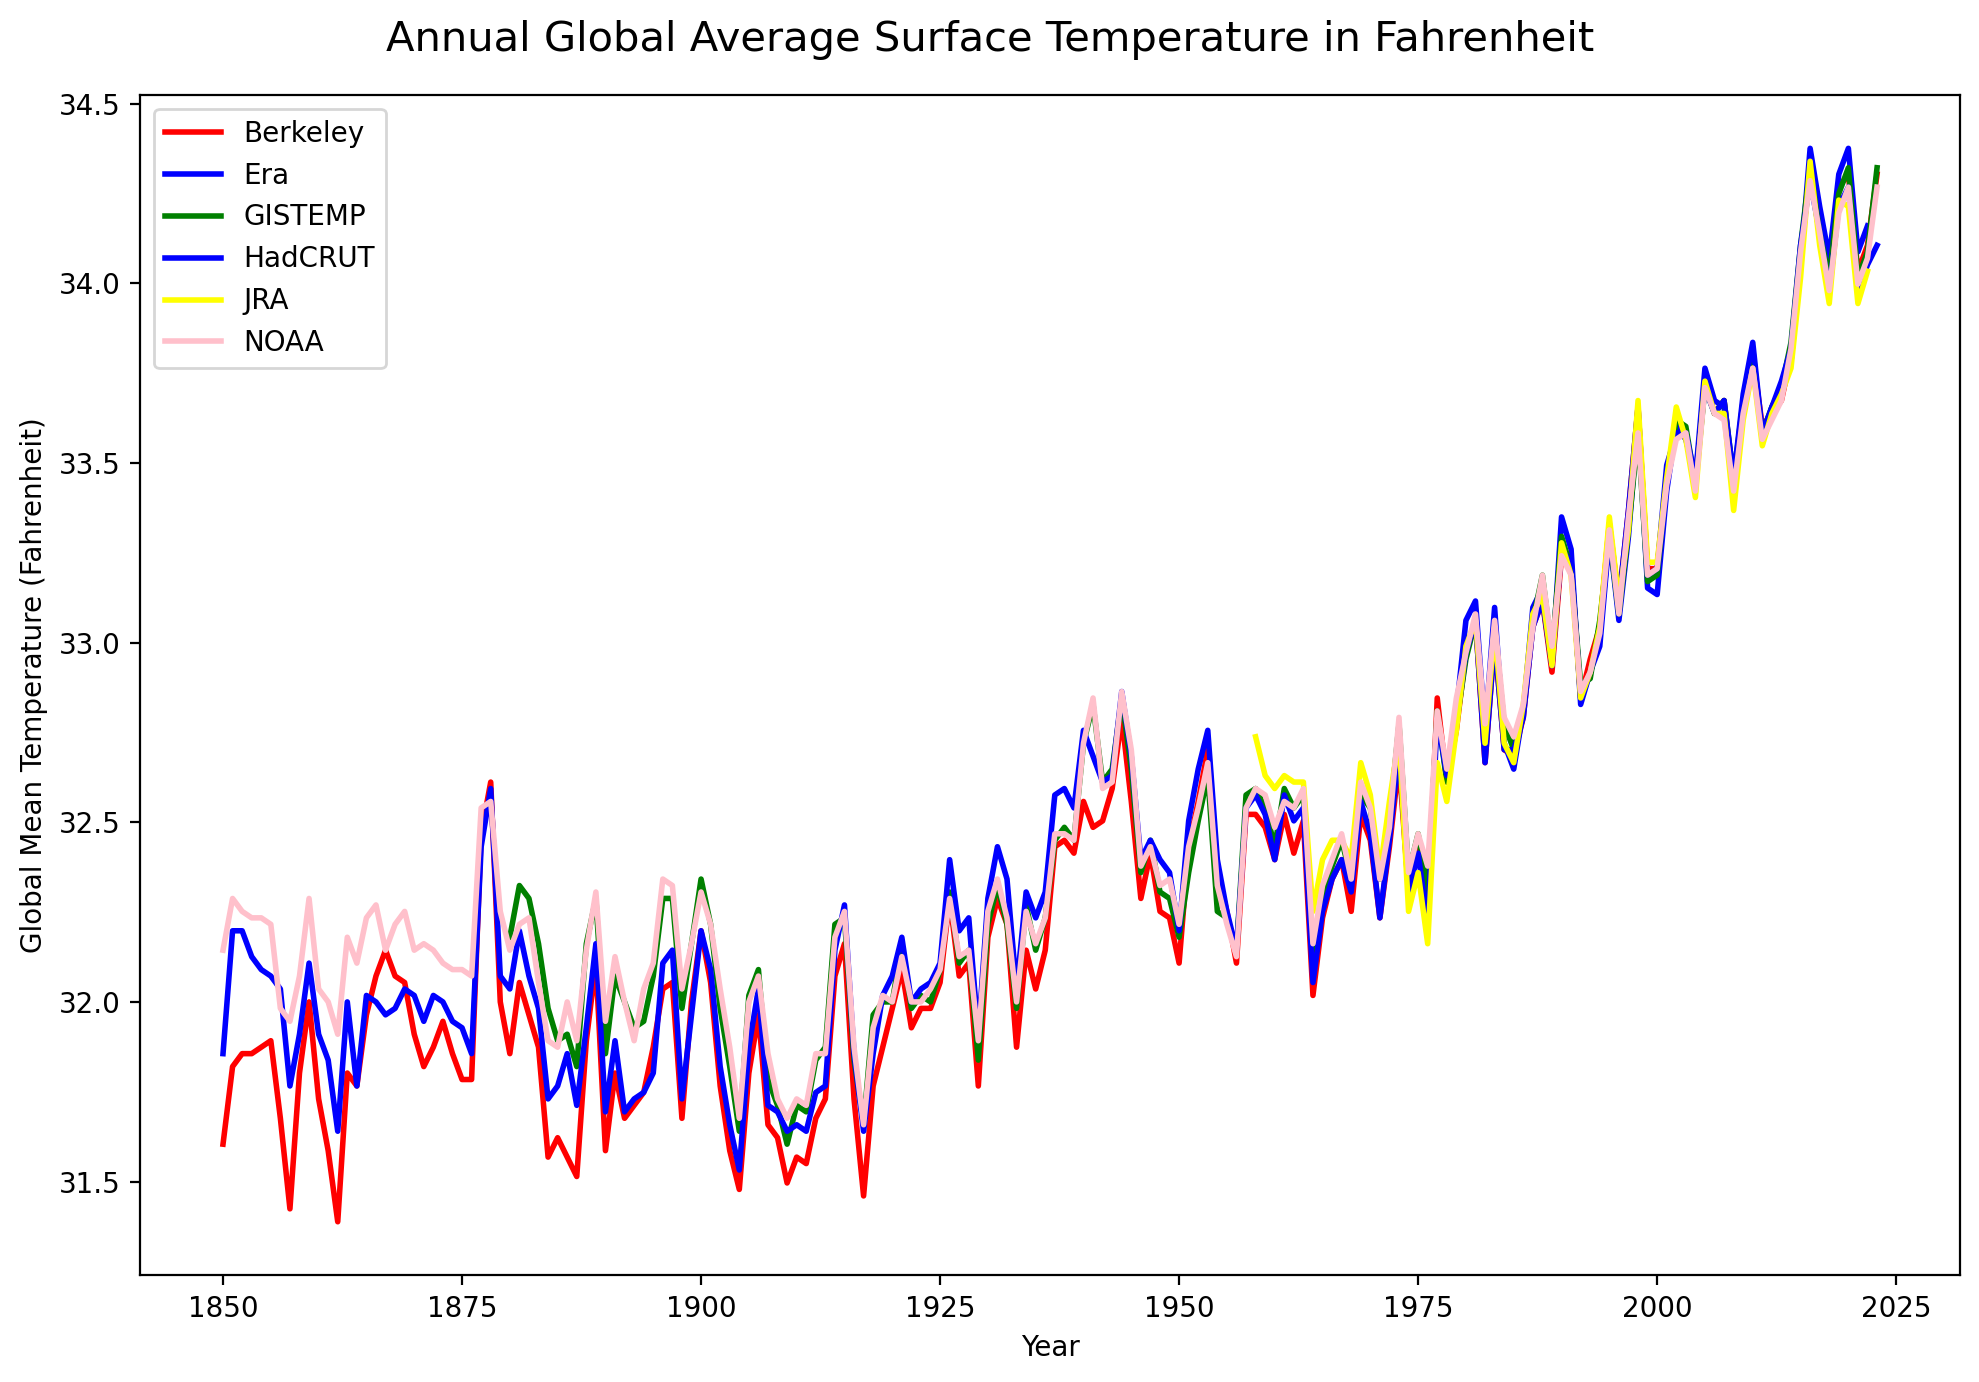

In [100]:
#plots displaying the GMT in fahrenheit

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
fig.suptitle('Annual Global Average Surface Temperature in Fahrenheit', fontsize=15)
ax.plot(gmt_Berkeley ['Year'], Berk_f, linewidth=2,label='Berkeley', color='red')

ax.plot(gmt_Era5 ['Year'], ERAf, linewidth=2,label='Era', color='blue')

ax.plot(gmt_GISTEMP  ['Year'], GISTEMPf, linewidth=2,label='GISTEMP', color='green')

ax.plot(gmt_HadCRUT5 ['Year'], HADf, linewidth=2,label='HadCRUT', color='blue')

ax.plot(gmt_JRA ['Year'], JRAf, linewidth=2,label='JRA', color='yellow')

ax.plot(gmt_NOAA ['Year'], NOAAf, linewidth=2,label='NOAA', color='pink')

ax.legend()
ax.set_ylabel('Global Mean Temperature (Fahrenheit)')
ax.set_xlabel('Year')

plt.tight_layout()

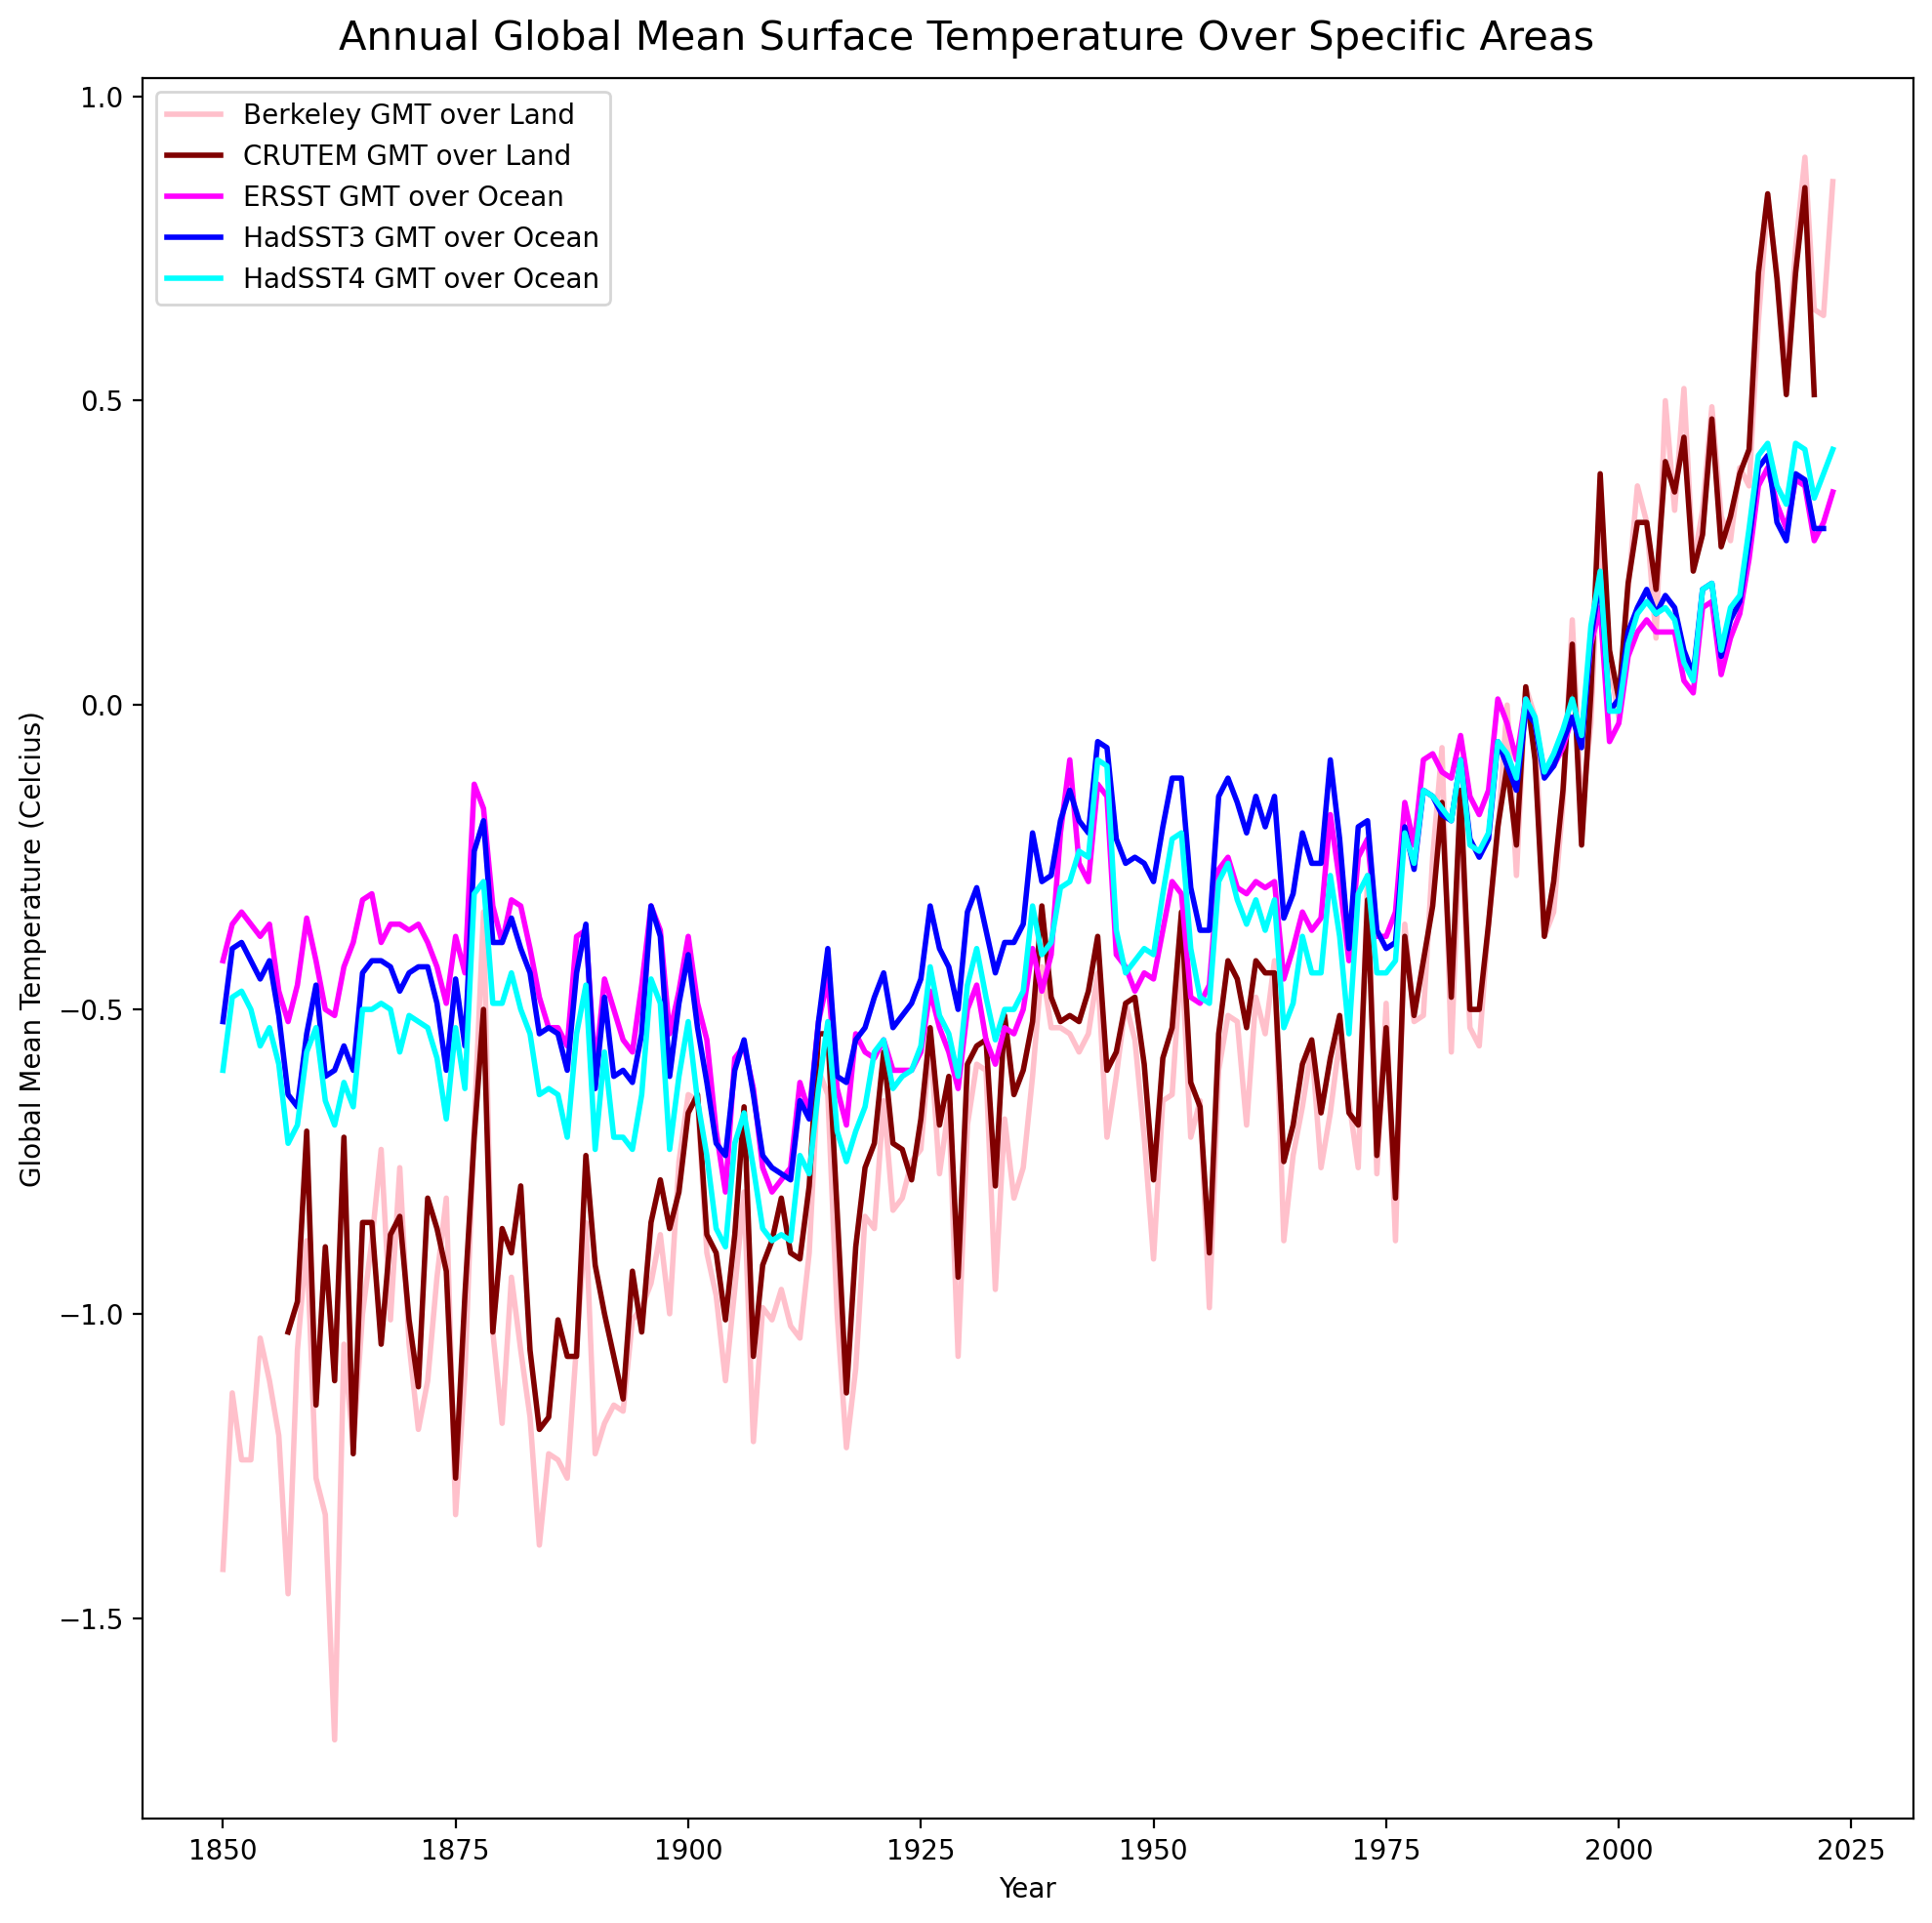

In [103]:
#plot displaying global mean temperature over land and ocean

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
fig.suptitle('Annual Global Mean Surface Temperature Over Specific Areas', fontsize=15)
ax.plot(lsat_Berkeley ['Year'], lsat_Berkeley['Berkeley Earth Land (degC)'], linewidth=2,label='Berkeley GMT over Land', color='pink')

ax.plot(lsat_CRUTEM5 ['Year'], lsat_CRUTEM5['CRUTEM5 (degC)'], linewidth=2,label='CRUTEM GMT over Land', color='maroon')

ax.plot(sst_ERSST  ['Year'], sst_ERSST ['ERSSTv5 (degC)'], linewidth=2,label='ERSST GMT over Ocean', color='magenta')
ax.plot(sst_HadSST3 ['Year'], sst_HadSST3['HadSST3 (degC)'], linewidth=2,label='HadSST3 GMT over Ocean', color='blue')
ax.plot(sst_HadSST4  ['Year'], sst_HadSST4 ['HadSST4 (degC)'], linewidth=2,label='HadSST4 GMT over Ocean', color='cyan')

ax.legend()
ax.set_ylabel('Global Mean Temperature (Celcius)')
ax.set_xlabel('Year')


plt.tight_layout()

<span style="color:red"> #14 Which is warming at a faster rate: the ocean surface or land? Why? Justify your explanation with a citation if you researched this
<span style="color:black"> answer 

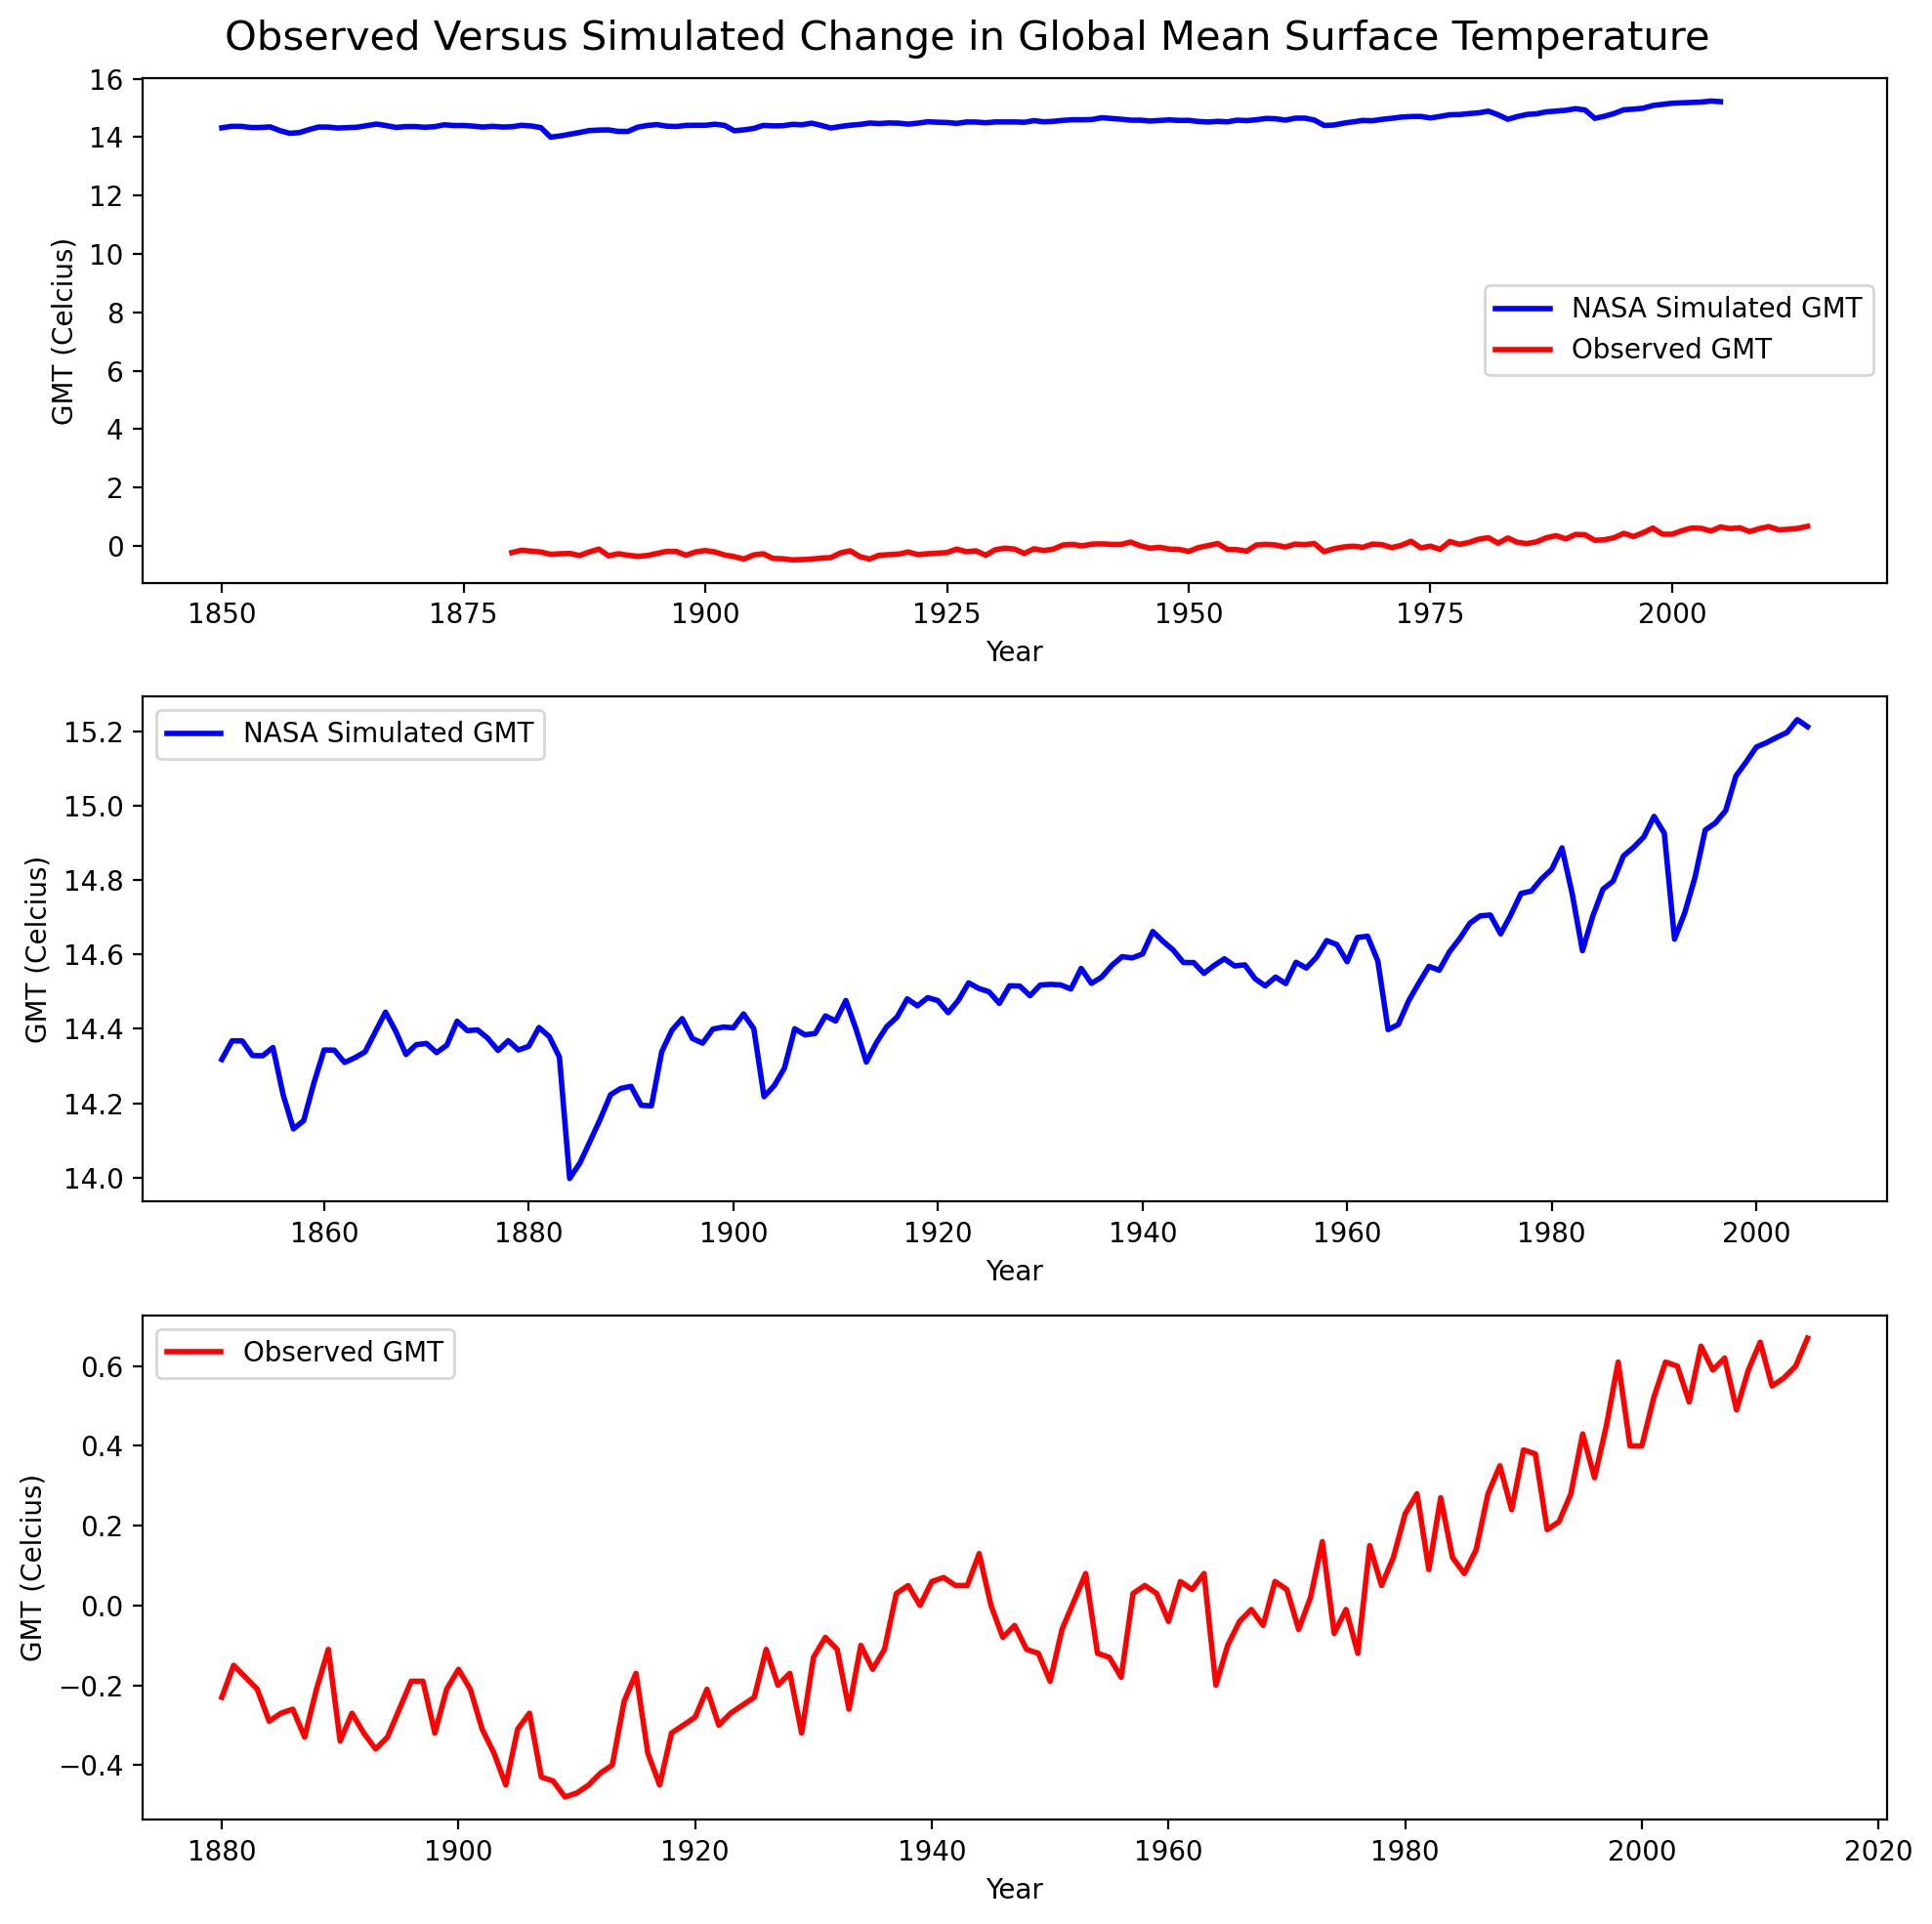

In [104]:
#plot comparing the observed change in GMT versus simulated GMT

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 10))
fig.suptitle('Observed Versus Simulated Change in Global Mean Surface Temperature', fontsize=15)
ax1.plot(NASA_sim ['Year'], NASA_sim ['All forcings']-273.15, linewidth=2,label='NASA Simulated GMT', color='blue')
ax1.plot(Obs_Temp  ['Year'], Obs_Temp  ['Annual_Mean'], linewidth=2,label='Observed GMT', color='red')
ax2.plot(NASA_sim ['Year'], NASA_sim ['All forcings']-273.15, linewidth=2,label='NASA Simulated GMT', color='blue')
ax3.plot(Obs_Temp  ['Year'], Obs_Temp  ['Annual_Mean'], linewidth=2,label='Observed GMT', color='red')

ax1.legend()
ax1.set_ylabel('GMT (Celcius)')
ax1.set_xlabel('Year')
ax2.legend()
ax2.set_ylabel('GMT (Celcius)')
ax2.set_xlabel('Year')
ax3.legend()
ax3.set_ylabel('GMT (Celcius)')
ax3.set_xlabel('Year')


plt.tight_layout()


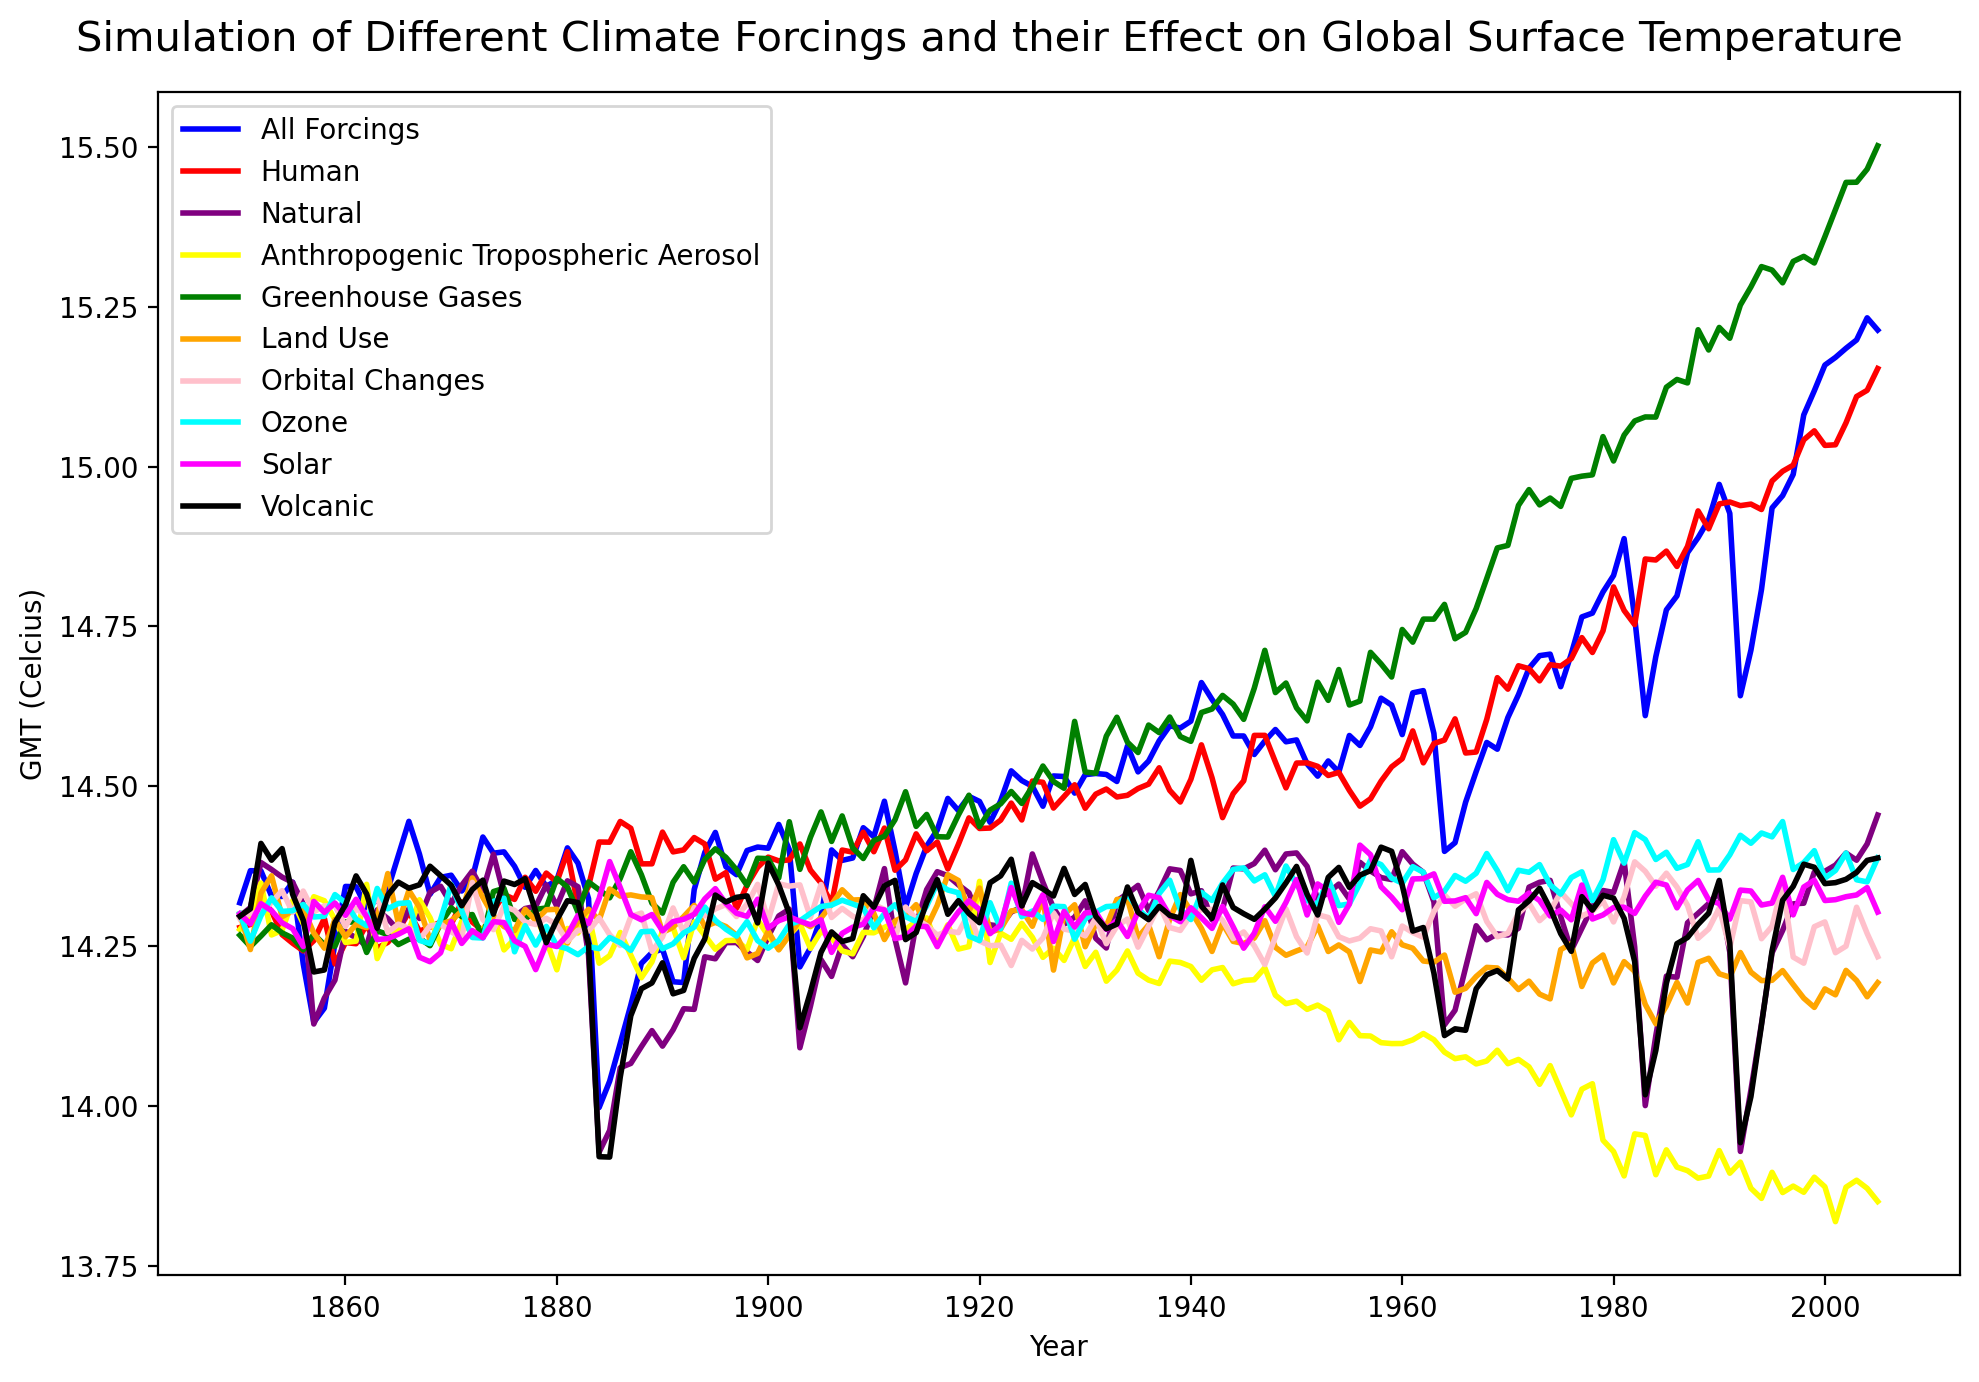

In [9]:
#plot comparing different forcing effects

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))
fig.suptitle('Simulation of Different Climate Forcings and their Effect on Global Surface Temperature', fontsize=15)
ax.plot(NASA_sim ['Year'], NASA_sim ['All forcings']-273.15, linewidth=2,label='All Forcings', color='blue')
ax.plot(NASA_sim   ['Year'], NASA_sim   ['Human']-273.15, linewidth=2,label='Human', color='red')
ax.plot(NASA_sim ['Year'], NASA_sim ['Natural']-273.15, linewidth=2,label='Natural', color='purple')
ax.plot(NASA_sim   ['Year'], NASA_sim['Anthropogenic tropospheric aerosol']-273.15, linewidth=2,label='Anthropogenic Tropospheric Aerosol', color='yellow')
ax.plot(NASA_sim ['Year'], NASA_sim ['Greenhouse gases']-273.15, linewidth=2,label='Greenhouse Gases', color='green')
ax.plot(NASA_sim ['Year'], NASA_sim ['Land use']-273.15, linewidth=2,label='Land Use', color='orange')
ax.plot(NASA_sim ['Year'], NASA_sim ['Orbital changes']-273.15, linewidth=2,label='Orbital Changes', color='pink')
ax.plot(NASA_sim ['Year'], NASA_sim ['Ozone']-273.15, linewidth=2,label='Ozone', color='cyan')
ax.plot(NASA_sim ['Year'], NASA_sim ['Solar']-273.15, linewidth=2,label='Solar', color='magenta')
ax.plot(NASA_sim ['Year'], NASA_sim ['Volcanic']-273.15, linewidth=2,label='Volcanic', color='black')

ax.legend()
ax.set_ylabel('GMT (Celcius)')
ax.set_xlabel('Year')



plt.tight_layout()

<span style="color:red"> #15 Using your analysis of the climate model experiments where the Earth system was forced with individual climate forcing agents, how and why do the following forcing agents impact Earth’s temperature
<span style="color:black"> answer 